# Term Project
# Group 13

In [1]:
#Nomenclature:

#gamma_G                 # Gas gravity 
#TPC1                    # Pseudo critical temperature, degree R
#PPC1                    # Pseudo critical pressure, psai
#ZFACT                   # Gas compressibility factor
#GFVF                    # Gas formation volume factor, cu.ft/SCF
#MWG                     # Gas molecular weight, lbm/lb-mole
#dens_gas                # Gas density, lbm/cu.ft
#GVISC                   # Gas viscosity, cp
#gor_solution            # Solution gas-oil ratio, SCF/STB
#gamma_oil               # Oil gravity
#fvf_oil                 # Oil formation volume factor, bbl/STB
#dens_oil                # Oil density, lbm/cu.ft
#ift_og                  # Gas-oil interfacial tension, dynes/cm
#vis_oil_dead            # Dead oil viscosity, cp
#vis_oil                 # Saturated oil viscosity, cp
#rate_oil                # In-situ oil rate, cu.ft/s
#rate_gas                # In-situ gas rate, cu.ft/s
#vel_mix                 # Mixture velocity, ft/s
#hold_ns_liq             # No slip liquid holdup
#num_fr                  # Froud numer
#num_lone                # Dimensionless number L1
#num_ltwo                # Dimensionless number L2
#num_lthree              # Dimensionless number L3
#num_lfour               # Dimensionless number L4
#num_vl                  # Liquid velocity number
#holdup_liq              # Liquid holdup
#dens_ns                 # No-slip mixture density, lbm/cu.ft
#num_re                  # Reynolds number 
#friction_tp             # Friction factor
#dens_holdup             # Holdup mixture density, lbm/cu.ft
#grad_pres_tot           # Hydrostatic pressure gradient, psi/ft
#grad_pres_pe            # Total pressure gradient, psi/ft
#grad_temp               # Temperature gradient, Degree F/ft


# Models Assigned:
# Oil Viscosity Model A: Petrosky and Farshad (1995)
# Two-phase flow Model B: Beggs and Brill method (1973)




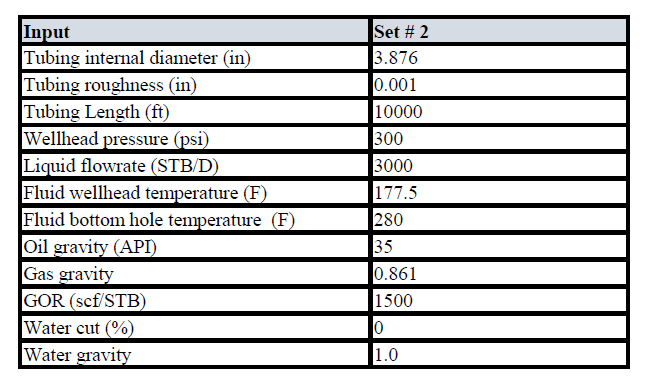



In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

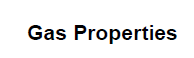
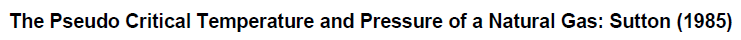
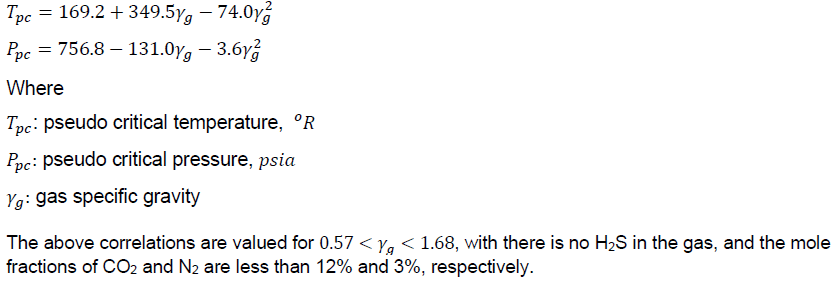
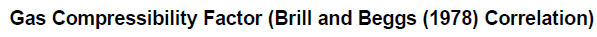
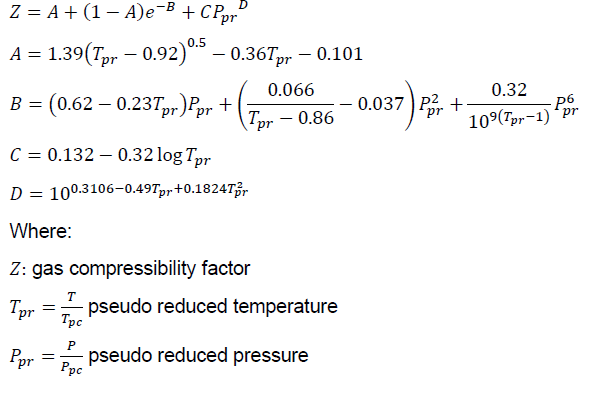

In [3]:
def TPC1(gamma_G):
    value_TPC1 = 169.2 + 349.5 * gamma_G - 74 * (gamma_G * gamma_G)
    return value_TPC1

In [4]:
gamma_G = 0.861
pseudo_critical_tempertaure = TPC1(gamma_G)
print("The value of pseudo critical tempertaure is: ", pseudo_critical_tempertaure, "\N{SUPERSCRIPT zero}R")

The value of pseudo critical tempertaure is:  415.26174599999996 ⁰R


In [5]:
def PPC1(gamma_G):
    value_PPC1 = 756.8 - 131 * gamma_G - 3.6 * (gamma_G * gamma_G)
    return value_PPC1

In [6]:
gamma_G = 0.861
pseudo_critical_pressure = PPC1(gamma_G)
print("The value of pseudo critical pressure is: ", pseudo_critical_pressure, "psia")

The value of pseudo critical pressure is:  641.3402444 psia


In [7]:
def ZFACT(temp, pres, gamma_G):
    Tpr = (temp+459.69)/TPC1(gamma_G)
    Ppr = pres/PPC1(gamma_G)
    A = 1.39 * (Tpr - 0.92) ** 0.5 - 0.36 * Tpr - 0.101
    B = Ppr * (0.62 - 0.23 * Tpr) + (0.066 / (Tpr - 0.86) - 0.037) * (Ppr ** 2) + 0.32 * Ppr ** 6 / (10 ** (9 * (Tpr - 1)))
    C = 0.132 - (0.32 * (math.log10(Tpr)))
    D = 10 ** (0.3106 - 0.49 * Tpr + 0.1824 * (Tpr ** 2))
    Z = A + (1 - A) * math.exp(-B) + C * Ppr ** D
    return Z


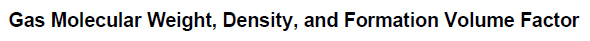
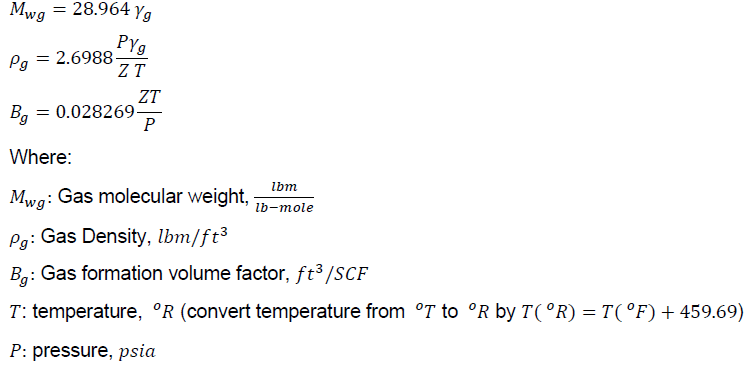
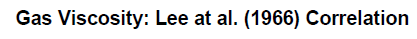
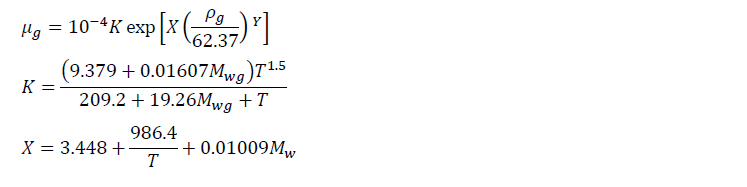
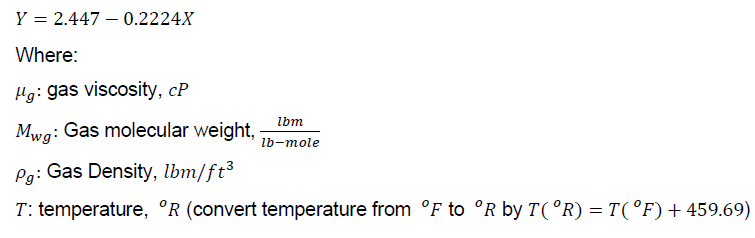


In [8]:
def GFVF(temp, pres, ZFACT):
    value_GFVF=0.028269*ZFACT(temp, pres, gamma_G)*(temp + 459.69)/pres
    return value_GFVF

In [9]:
def MWG(gamma_G):
    value_MWG = 28.964 * gamma_G
    return value_MWG

In [10]:
def dens_gas(temp, pres, gamma_G, ZFACT):
    value_dens_gas=2.6988*pres*gamma_G/(ZFACT(temp, pres, gamma_G)*(temp+459.69))
    return value_dens_gas

In [11]:
def GVISC(temp, pres, MWG):
    K=(9.379+0.01607*MWG(gamma_G))*((temp+459.69)**1.5)/(209.2+19.26*MWG(gamma_G)+(temp+459.69))
    X=3.448+ 986.4/(temp+459.69) + 0.01009*MWG(gamma_G)
    Y=2.447-0.2224*X
    value_GVISC=(10**(-4))*K*math.exp(X*((dens_gas(temp, pres, gamma_G, ZFACT)/62.37)**Y))
    return value_GVISC



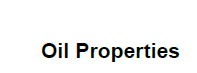
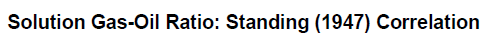
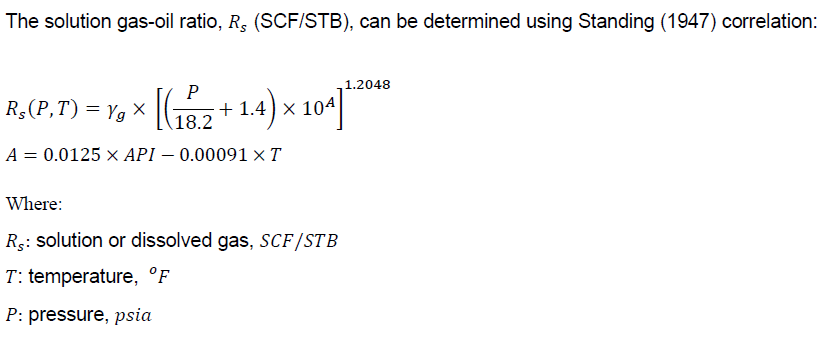




In [12]:
def gor_solution(temp, pres, gamma_G):
    API=35
    A=(0.0125*API)-(0.00091*temp)
    value_gor_solution=gamma_G*(((pres/18.2)+1.4)*(10**A))**1.2048
    return value_gor_solution

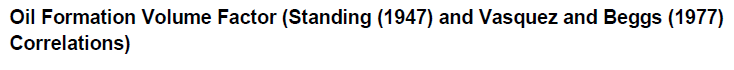
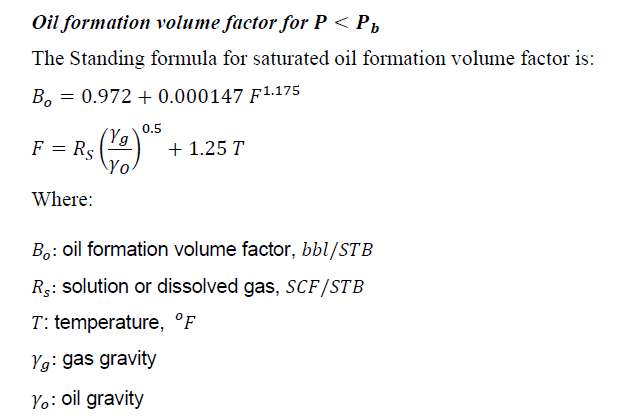



In [13]:
def gamma_oil(API):
    API=35
    value_gamma_oil=141.5/(API+131.5)
    return value_gamma_oil

In [14]:
def fvf_oil(temp, gamma_G, gamma_oil):
    F=gor_solution(temp, pres, gamma_G)*((gamma_G/gamma_oil(API))**0.5)+1.25*temp
    value_fvf_oil=0.972+0.000147*(F**1.175)
    return value_fvf_oil

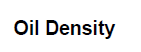
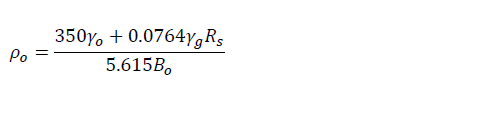
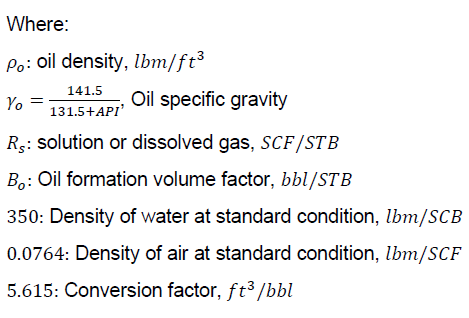



In [15]:
def dens_oil(gamma_G, gamma_oil, gor_solution, fvf_oil):
    value_dens_oil=((350*gamma_oil(API))+(0.076*gamma_G*gor_solution(temp, pres, gamma_G)))/(5.615*fvf_oil(temp, gamma_G, gamma_oil))
    return value_dens_oil

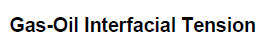
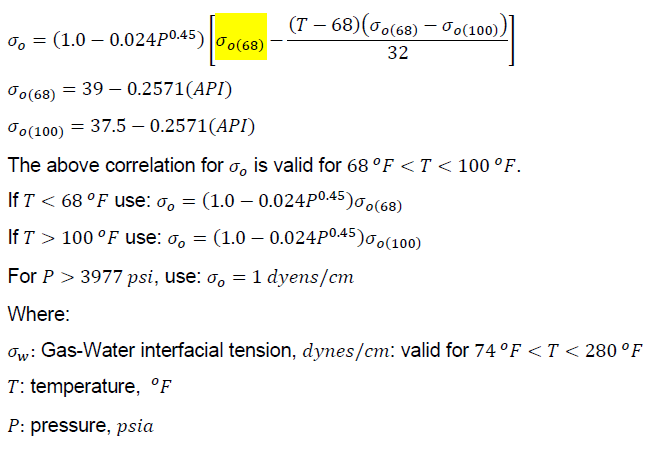



In [16]:
def ift_og(temp, pres, API):
    sigma68=39-0.2571*API
    sigma100=37.5-0.2571*API
    value_ift_og=(1-0.024*(pres**0.45))*(sigma100)
    return value_ift_og

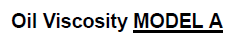
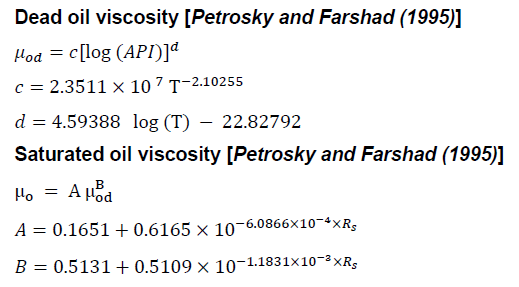



In [17]:
def vis_oil_dead(temp, API):
    c_1=23511000/(temp**2.10255)
    d_1=4.59388*(math.log10(temp))-22.82792
    value_vis_oil_dead=c_1*((math.log10(API))**d_1)
    return value_vis_oil_dead

In [18]:
def vis_oil(vis_oil_dead):
    A=0.1651+0.6165/(10**(6.0866*gor_solution(temp, pres, gamma_G)/10000))
    B=0.5131+0.5109/(10**(1.1831*gor_solution(temp, pres, gamma_G)/1000))
    value_vis_oil=A*(vis_oil_dead(temp, API)**B)
    return value_vis_oil


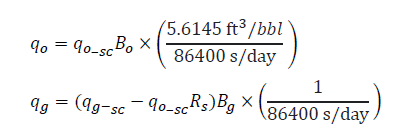



In [19]:
def rate_oil(fvf_oil):
    orsc=3000
    value_rate_oil=orsc*fvf_oil(temp, gamma_G, gamma_oil)*5.615/86400
    return value_rate_oil

In [20]:
def rate_gas(gor_solution, GFVF):
    orsc=3000
    GOR=1500
    grsc=3000*GOR
    value_rate_gas=(grsc-(orsc*gor_solution(temp, pres, gamma_G)))*GFVF(temp, pres, ZFACT)/86400
    return value_rate_gas

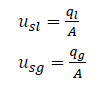
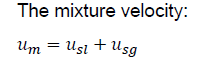
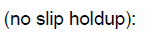
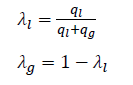



In [21]:
def vel_mix(rate_oil, rate_gas):
    A=math.pi*D*D/(4*144)
    value_vel_mix=(rate_oil(fvf_oil)/A)+(rate_gas(gor_solution, GFVF)/A)
    return value_vel_mix

In [22]:
def hold_ns_liq(rate_oil, vel_mix):
    value_hold_ns_liq=(rate_oil(fvf_oil)/(math.pi*D*D/(4*144)))/(vel_mix(rate_oil, rate_gas))
    return value_hold_ns_liq

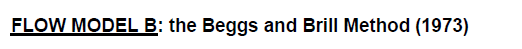


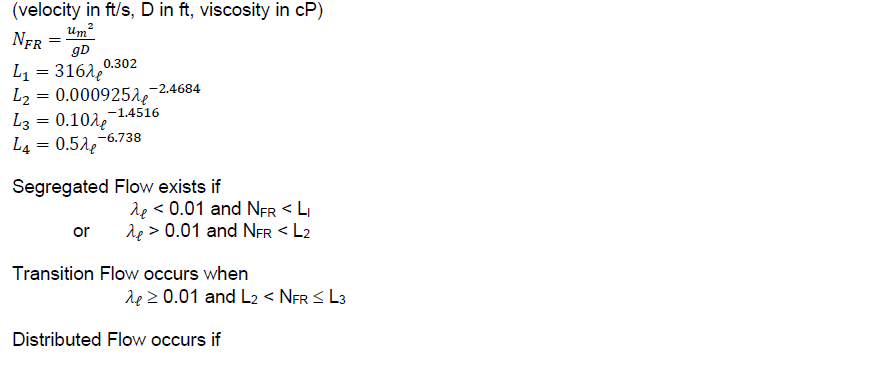
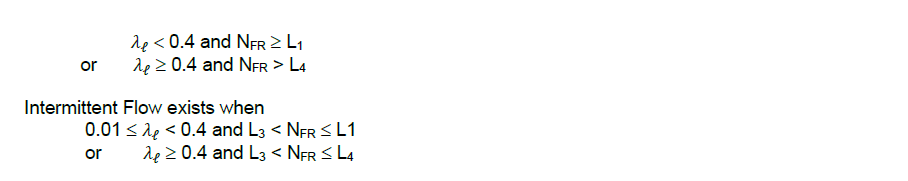

In [23]:
def num_fr(vel_mix):
    D=3.876
    value_num_fr=((vel_mix(rate_oil, rate_gas))**2)/(32.17*(D/12))
    return value_num_fr

In [24]:
def num_lone(hold_ns_liq):
    value_num_lone=316*hold_ns_liq(rate_oil, vel_mix)**0.302
    return value_num_lone

In [25]:
def num_ltwo(hold_ns_liq):
    value_num_ltwo=0.000925*hold_ns_liq(rate_oil, vel_mix)**(-2.4684)
    return value_num_ltwo

In [26]:
def num_lthree(hold_ns_liq):
    value_num_lthree=0.10*hold_ns_liq(rate_oil, vel_mix)**(-1.4516)
    return value_num_lthree

In [27]:
def num_lfour(hold_ns_liq):
    value_num_lfour=0.5*hold_ns_liq(rate_oil, vel_mix)**(-6.738)
    return value_num_lfour



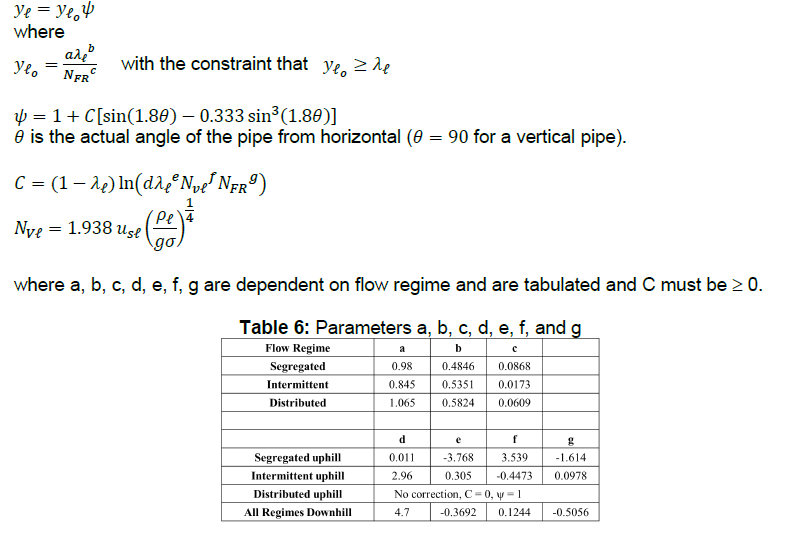



In [28]:
pres = 300
temp = 177.5
API = 35
D = 3.876
F_P=None   #flow Pattern
F_D='uphill'   #flow direction
if hold_ns_liq(rate_oil, vel_mix)<0.01 and num_fr(vel_mix)<num_lone(hold_ns_liq) or hold_ns_liq(rate_oil, vel_mix)>=0.01 and num_fr(vel_mix)<num_ltwo(hold_ns_liq):
    F_P='Segregated'
    a=0.98
    b=0.4846 
    c=0.0868
elif hold_ns_liq(rate_oil, vel_mix)>=0.01 and num_fr(vel_mix)>num_ltwo(hold_ns_liq) and num_fr(vel_mix)<num_lthree(hold_ns_liq):
    F_P='Transition'
    a=1 
    b=1 
    c=1
elif hold_ns_liq(rate_oil, vel_mix)>=0.01 and hold_ns_liq(rate_oil, vel_mix)<0.4 and num_fr(vel_mix)>num_lthree(hold_ns_liq) and num_fr(vel_mix)<num_lone(hold_ns_liq):
    F_P='Intermittent'
    a=0.845
    b=0.5351
    c=0.0173
elif hold_ns_liq(rate_oil, vel_mix)>=0.4 and num_fr(vel_mix)>num_lthree(hold_ns_liq) and num_fr(vel_mix)<=num_lfour(hold_ns_liq):
    F_P='Intermittent'
    a=0.845
    b=0.5351
    c=0.0173
elif (hold_ns_liq(rate_oil, vel_mix)<0.4 and num_fr(vel_mix)>=num_lone(hold_ns_liq)) or (hold_ns_liq(rate_oil, vel_mix)>=0.4 and num_fr(vel_mix)>num_lfour(hold_ns_liq)):
    F2='Distributed'
    a=1.065
    b=0.5824
    c=0.0609
else:
    F_P='error'
    
    
if F_D=='uphill' and F_P =='Segregated':
    d=0.011
    e=-3.768
    f=3.539
    g=-1.614
elif F_D=='uphill' and F_P =='Intermittent':
    d=2.96
    e=0.305
    f=-0.4473
    g=0.0978
elif F_D=='uphill' and F_P =='Distributed':
    d=1
    e=1
    f=1
    g=1
elif F_D=='downhill':
    d=4.70
    e=-0.3692
    f=0.1244
    g=-0.5056
else:
    d=1
    e=1
    f=1
    g=1


In [29]:
def Ylo(hold_ns_liq, num_fr):
    Ylo=a*((hold_ns_liq(rate_oil, vel_mix))**b)/(num_fr(vel_mix)**c)
    return Ylo

In [30]:
def num_vl(rate_oil, dens_oil, ift_og):
    num_vl=1.938*(rate_oil(fvf_oil)/(math.pi*D*D/(4*144)))*((dens_oil(gamma_G, gamma_oil, gor_solution, fvf_oil)/32.17*ift_og(temp, pres, API))**0.25)
    return num_vl

In [31]:
def holdup_liq(Ylo):
    C=(1-hold_ns_liq(rate_oil, vel_mix))*(math.log(d*(hold_ns_liq(rate_oil, vel_mix)**e)*(num_vl(rate_oil, dens_oil, ift_og)**f)*(num_fr(vel_mix)**g)))
    Ψ=1+C*(math.sin(162)-0.333*(math.sin(162)*math.sin(162)*math.sin(162)))
    holdup_liq=Ylo(hold_ns_liq, num_fr)*Ψ
    return holdup_liq

In [32]:
def dens_ns(hold_ns_liq, dens_oil, dens_gas):
    value_dens_ns=(1-hold_ns_liq(rate_oil, vel_mix))*dens_gas(temp, pres, gamma_G, ZFACT)+(hold_ns_liq(rate_oil, vel_mix)*dens_oil(gamma_G, gamma_oil, gor_solution, fvf_oil))
    return value_dens_ns



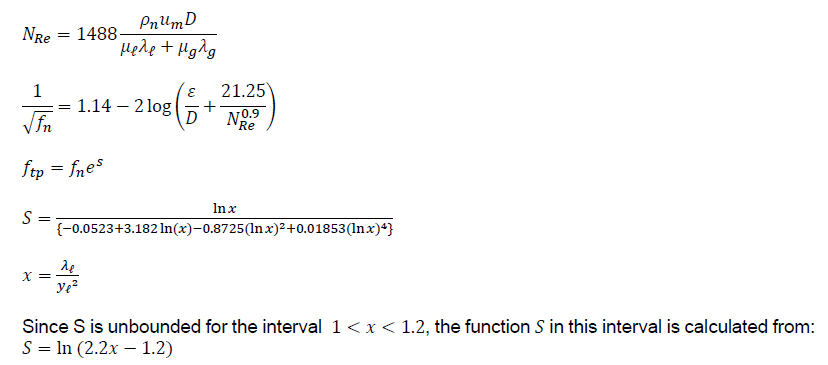



In [33]:
def num_re(hold_ns_liq, dens_ns, vel_mix, vis_oil, GVISC):
    D=3.876
    num_re=1488*dens_ns(hold_ns_liq, dens_oil, dens_gas)*vel_mix(rate_oil, rate_gas)*(D/12)/((vis_oil(vis_oil_dead)*hold_ns_liq(rate_oil, vel_mix))+(GVISC(temp, pres, MWG)*(1-hold_ns_liq(rate_oil, vel_mix))))
    return num_re

In [34]:
def fn(num_re):
    D=3.876
    ε=0.001
    fn=1/((1.14-2*math.log10((ε/D)+(21.25/num_re(hold_ns_liq, dens_ns, vel_mix, vis_oil, GVISC)**0.9)))**2)
    return fn

In [35]:
def friction_tp(fn):
    x=hold_ns_liq(rate_oil, vel_mix)/holdup_liq(Ylo)**2
    S=math.log(x)/(-0.0523+3.182*math.log(x)-(0.8725*(math.log(x))**2)+(0.01853*(math.log(x))**4))
    friction_tp=fn(num_re)*2.7182**S
    return friction_tp

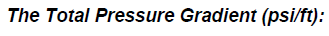
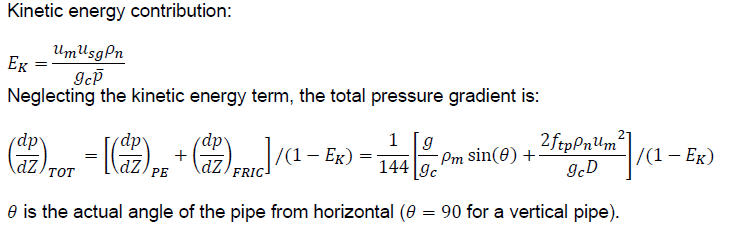



In [36]:
def dens_holdup(holdup_liq, dens_gas, dens_oil):
    dens_holdup=(1-holdup_liq(Ylo))*dens_gas(temp, pres, gamma_G, ZFACT)+(holdup_liq(Ylo)*dens_oil(gamma_G, gamma_oil, gor_solution, fvf_oil))
    return dens_holdup

In [37]:
def grad_pres_tot(dens_holdup, friction_tp, dens_ns, vel_mix):
    value_grad_pres_tot=(dens_holdup(holdup_liq, dens_gas, dens_oil)/144)+(2*friction_tp(fn)*dens_ns(hold_ns_liq, dens_oil, dens_gas)*vel_mix(rate_oil, rate_gas)*vel_mix(rate_oil, rate_gas))/(D*32.17*12)
    return value_grad_pres_tot

In [38]:
def grad_temp(Twh, Twf, L):
    value_grad_temp=(Twf-Twh)/L
    return value_grad_temp

In [39]:
def pres_2(grad_pres_tot, pres_1):
    value_pres_2 = pres_1 + grad_pres_tot(dens_holdup, friction_tp, dens_ns, vel_mix)*del_L/2
    return value_pres_2

In [40]:
## Information about the well:

L = 10000 #ft, well length
del_L = 200 #ft, segment length
D = 3.876 #in, well tubing I.D.
Twh = 177.5 #degree F, wellhead tempertaure
Twf = 280 #degree F, bottomhole temperature
gamma_G = 0.861 # gas gravity
Pwh = 300 #psia, wellhead pressure
ε = 0.001 #in, tube roughness
orsc = 3000
GOR = 1500
grsc = 3000*GOR
API = 35
n = 50 # number of well segments
dL = L/n #ft, length of each segment


Depth 200
pres_1: 300
value_pres_2: 342.99018634259147
Depth 400
pres_1: 342.99018634259147
value_pres_2: 379.68377372673973
Depth 600
pres_1: 379.68377372673973
value_pres_2: 413.61635314847655
Depth 800
pres_1: 413.61635314847655
value_pres_2: 445.9105869939655
Depth 1000
pres_1: 445.9105869939655
value_pres_2: 477.0932645349817
Depth 1200
pres_1: 477.0932645349817
value_pres_2: 507.4619930662861
Depth 1400
pres_1: 507.4619930662861
value_pres_2: 537.2046127256881
Depth 1600
pres_1: 537.2046127256881
value_pres_2: 566.4488125218118
Depth 1800
pres_1: 566.4488125218118
value_pres_2: 595.2861443616652
Depth 2000
pres_1: 595.2861443616652
value_pres_2: 623.7849436079017
Depth 2200
pres_1: 623.7849436079017
value_pres_2: 651.9978461727931
Depth 2400
pres_1: 651.9978461727931
value_pres_2: 679.9664336689551
Depth 2600
pres_1: 679.9664336689551
value_pres_2: 707.7242449635163
Depth 2800
pres_1: 707.7242449635163
value_pres_2: 735.2988065891782
Depth 3000
pres_1: 735.2988065891782
value_pre

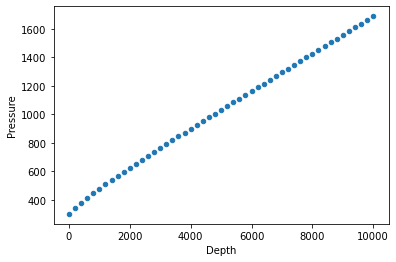

In [41]:
x_axis = []
y_axis = []
i=0
pres_1 = Pwh
temp_1 = Twh
value_temp_2 = Twh
temp_ave = value_temp_2
temp = temp_ave
value_pres_2 = Pwh
pres_ave = value_pres_2
pres = pres_ave
x_axis.append(i)
y_axis.append(value_pres_2)

for i in range(200,L + del_L,del_L):
    Pwh = value_pres_2 
    print(f"Depth {i}")
    print(f"pres_1: {Pwh}")
    del_pres = 1 
    x_axis.append(i)
    while del_pres >= 0.00001:
        temp_1 = temp
        temp = grad_temp(Twh, Twf, L) * i
        temp_2 = temp_ave
        temp_ave = (temp_2 + temp_1)/2
        pres_1 = Pwh
        value_pres_2 = pres_2(grad_pres_tot, pres_1)
        pres_ave_old = pres_ave
        pres_ave = (value_pres_2 + pres_1)/2
        Z = ZFACT(temp_ave, pres_ave, gamma_G)
        value_GFVF  = GFVF(temp_ave, pres_ave, ZFACT)
        value_GVISC = GVISC(temp_ave, pres_ave, MWG)
        del_pres = abs(pres_ave - pres_ave_old)
    print(f"value_pres_2: {value_pres_2}")
    y_axis.append(value_pres_2)
    
data_ptranvers = {
    'Depth': x_axis,
    'Pressure': y_axis
}

df_ptransvers = pd.DataFrame(data_ptranvers)
print(df_ptransvers)
df_ptransvers.plot(kind='scatter', x='Depth', y='Pressure')
plt.show()



    Depth    temp
0       0  177.50
1     200  179.55
2     400  181.60
3     600  183.65
4     800  185.70
5    1000  187.75
6    1200  189.80
7    1400  191.85
8    1600  193.90
9    1800  195.95
10   2000  198.00
11   2200  200.05
12   2400  202.10
13   2600  204.15
14   2800  206.20
15   3000  208.25
16   3200  210.30
17   3400  212.35
18   3600  214.40
19   3800  216.45
20   4000  218.50
21   4200  220.55
22   4400  222.60
23   4600  224.65
24   4800  226.70
25   5000  228.75
26   5200  230.80
27   5400  232.85
28   5600  234.90
29   5800  236.95
30   6000  239.00
31   6200  241.05
32   6400  243.10
33   6600  245.15
34   6800  247.20
35   7000  249.25
36   7200  251.30
37   7400  253.35
38   7600  255.40
39   7800  257.45
40   8000  259.50
41   8200  261.55
42   8400  263.60
43   8600  265.65
44   8800  267.70
45   9000  269.75
46   9200  271.80
47   9400  273.85
48   9600  275.90
49   9800  277.95
50  10000  280.00


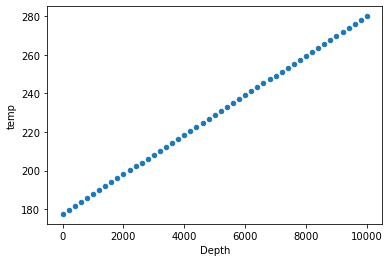

In [42]:
y1_temp=list()
x_Depth=list()
temp=177.5
for d in range(0,10200,200):
    Depth = d
    value_grad_temp=grad_temp(Twh, Twf, L)*d+Twh
    y1_temp.append(value_grad_temp)
    x_Depth.append(d)
                

# plot of Depth and temp
data_temp = { "Depth": x_Depth,"temp":y1_temp}

df_temp = pd.DataFrame(data_temp)

print(df_temp)
df_temp.plot(kind='scatter',x='Depth',y='temp')
plt.show()

# Conclusion:
#### Multiphase flow behavior is much more complex than for single phase flow. Several different flow patterns can exist in a given well as a result of the large pressure and temperature changes the fluids encounter.
#### Especially important is the significant variation in pressure gradient with flow pattern. Thus, the ability to predict flow pattern as a function of the flow parameters is of primary concern.
#### After generating pressure traverse data in Python using Beggs & Brill Model, A plot was generated on excel to show the differences between the calculated pressure traverse and the provided data.

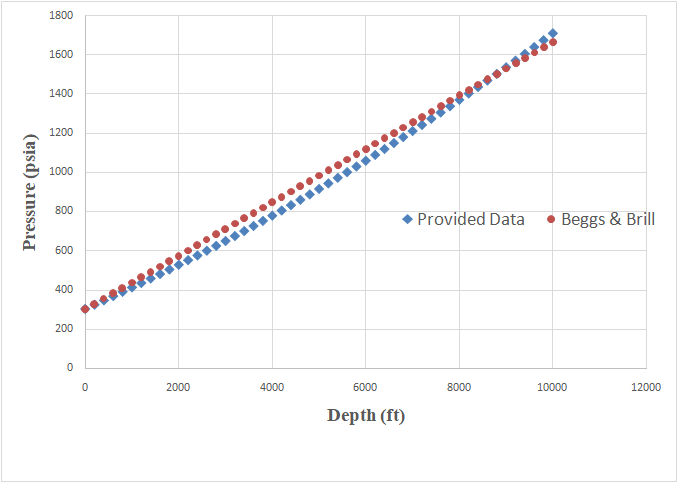

#### It can be seen from the graph that the calculated pressure traverse deviates from the given data when reaches the halfway followed by deviation approaches to zero near the end of tubing.




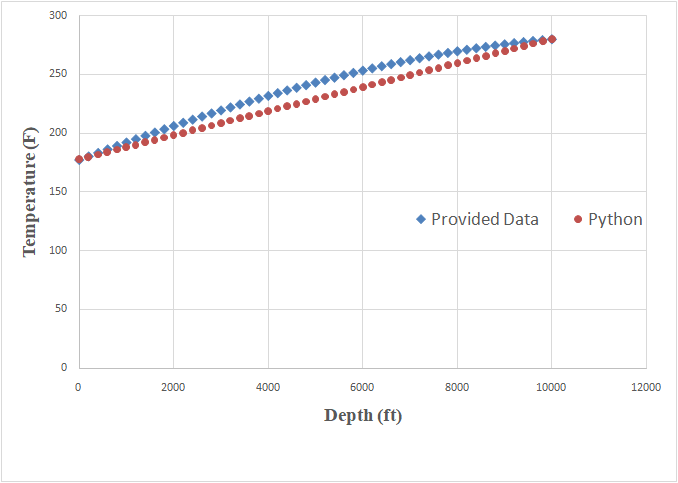



### Reason for Difference:
#### Beggs & Brill Correlation was developed from experimental data obtained in a small scale test facility. The parameters studied and their range of variation were:
####  Gas flow rate: 0-300 Mscf /D
####  Liquid flow rate: 0-30 gal/min
####  Average system pressure : 35 to 95 psia
####  Pipe diameter : 1-1.5 in
####  Liquid holdup : 0 to 0.870
####  Pressure gradient : 0 to 0.8 psi/ft
####  Inclination angle : -90°to +90°
####  Horizontal flow pattern
####  Fluids used were air and water
####  The correlations were developed from 584 measured tests.

